## Курсовой проект

#### Подключение библиотек

import numpy as np
import pandas as pd
import random

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold, GridSearchCV

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')
sns.set_context("paper", font_scale=1.5)  
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_rows', 50)

In [4]:
TRAIN_DATASET_PATH = r'C:\train.csv'
TEST_DATASET_PATH = r'C:\test.csv'

### работа с даннными

In [5]:
train_df = pd.read_csv(TRAIN_DATASET_PATH, index_col='Id')
train_df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
14038,35,2.00,47.98,29.44,6.00,7,9.00,1969,0.09,B,B,33,7976,5,nan,0,11,B,"184,966.93"
15053,41,3.00,65.68,40.05,8.00,7,9.00,1978,0.00,B,B,46,10309,1,240.00,1,16,B,"300,009.45"
4765,53,2.00,44.95,29.20,0.00,8,12.00,1968,0.05,B,B,34,7759,0,229.00,1,3,B,"220,925.91"
5809,58,2.00,53.35,52.73,9.00,8,17.00,1977,0.44,B,B,23,5735,3,"1,084.00",0,5,B,"175,616.23"
10783,99,1.00,39.65,23.78,7.00,11,12.00,1976,0.01,B,B,35,5776,1,"2,078.00",2,4,B,"150,226.53"


In [6]:
test_df = pd.read_csv(TEST_DATASET_PATH, index_col='Id')
test_df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
Id,,,,,,,,,,,,,,,,,,
725,58,2.00,49.88,33.43,6.00,6,14.00,1972,0.31,B,B,11,2748,1,nan,0,0,B
15856,74,2.00,69.26,nan,1.00,6,1.00,1977,0.08,B,B,6,1437,3,nan,0,2,B
5480,190,1.00,13.60,15.95,12.00,2,5.00,1909,0.00,B,B,30,7538,87,"4,702.00",5,5,B
15664,47,2.00,73.05,51.94,9.00,22,22.00,2007,0.10,B,B,23,4583,3,nan,3,3,B
14275,27,1.00,47.53,43.39,1.00,17,17.00,2017,0.07,B,B,2,629,1,nan,0,0,A


In [7]:
train_df.shape, test_df.shape

((10000, 19), (5000, 18))

### Просмотр типов данных

In [8]:
train_df.dtypes

DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [9]:
train_df['Rooms'] = train_df['Rooms'].astype('int64')
test_df['Rooms'] = test_df['Rooms'].astype('int64')

In [10]:
train_df['HouseFloor'] = train_df['HouseFloor'].astype('int64')
test_df['HouseFloor'] = test_df['HouseFloor'].astype('int64')

In [11]:
train_df.dtypes

DistrictId         int64
Rooms              int64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor         int64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [12]:
train_df.nunique()

DistrictId         205
Rooms                9
Square           10000
LifeSquare        7887
KitchenSquare       58
Floor               33
HouseFloor          44
HouseYear           97
Ecology_1          129
Ecology_2            2
Ecology_3            2
Social_1            51
Social_2           142
Social_3            30
Healthcare_1        79
Helthcare_2          7
Shops_1             16
Shops_2              2
Price            10000
dtype: int64

In [13]:
train_df.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,"10,000.00","10,000.00","10,000.00","7,887.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","5,202.00","10,000.00","10,000.00","10,000.00"
mean,50.40,1.89,56.32,37.20,6.27,8.53,12.61,"3,990.17",0.12,24.69,"5,352.16",8.04,"1,142.90",1.32,4.23,"214,138.86"
std,43.59,0.84,21.06,86.24,28.56,5.24,6.78,"200,500.26",0.12,17.53,"4,006.80",23.83,"1,021.52",1.49,4.81,"92,872.29"
min,0.00,0.00,1.14,0.37,0.00,1.00,0.00,"1,910.00",0.00,0.00,168.00,0.00,0.00,0.00,0.00,"59,174.78"
25%,20.00,1.00,41.77,22.77,1.00,4.00,9.00,"1,974.00",0.02,6.00,"1,564.00",0.00,350.00,0.00,1.00,"153,872.63"
50%,36.00,2.00,52.51,32.78,6.00,7.00,13.00,"1,977.00",0.08,25.00,"5,285.00",2.00,900.00,1.00,3.00,"192,269.64"
75%,75.00,2.00,65.90,45.13,9.00,12.00,17.00,"2,001.00",0.20,36.00,"7,227.00",5.00,"1,548.00",2.00,6.00,"249,135.46"
max,209.00,19.00,641.07,"7,480.59","2,014.00",42.00,117.00,"20,052,011.00",0.52,74.00,"19,083.00",141.00,"4,849.00",6.00,23.00,"633,233.47"


### Фильтрование и отсев

In [14]:
all_data = pd.concat((train_df, test_df), sort=False).reset_index(drop=True)
all_data.drop(['Price'], axis=1, inplace=True)
print(f'all_data size is : {all_data.shape}')

all_data size is : (15000, 18)


In [15]:
all_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DistrictId,"15,000.00",50.69,43.79,0.00,20.00,37.00,75.00,212.00
Rooms,"15,000.00",1.90,0.84,0.00,1.00,2.00,2.00,19.00
Square,"15,000.00",56.36,20.42,1.14,41.81,52.65,66.04,641.07
LifeSquare,"11,846.00",36.85,71.12,0.33,22.90,32.82,45.14,"7,480.59"
KitchenSquare,"15,000.00",6.17,24.02,0.00,1.00,6.00,9.00,"2,014.00"
Floor,"15,000.00",8.56,5.32,1.00,4.00,7.00,12.00,78.00
HouseFloor,"15,000.00",12.61,6.78,0.00,9.00,12.00,17.00,117.00
HouseYear,"15,000.00","3,321.58","163,707.78","1,908.00","1,974.00","1,977.00","2,001.00","20,052,011.00"
Ecology_1,"15,000.00",0.12,0.12,0.00,0.02,0.08,0.20,0.52
Social_1,"15,000.00",24.77,17.53,0.00,6.00,25.00,36.00,74.00


In [16]:
all_data.isna().sum()[all_data.isna().sum() != 0]

LifeSquare      3154
Healthcare_1    7175
dtype: int64

### Работа с выпадающими данными

In [17]:
all_data.loc[all_data['Rooms'] == 0]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
1397,27,0,138.43,136.22,0.00,4,3,2016,0.08,B,B,11,3097,0,nan,0,0,B
1981,27,0,212.93,211.23,0.00,2,3,2008,0.21,B,B,9,1892,0,nan,0,1,B
2269,27,0,41.79,nan,0.00,13,0,1977,0.21,B,B,9,1892,0,nan,0,1,B
3911,28,0,49.48,nan,0.00,16,0,2015,0.12,B,B,30,6207,1,"1,183.00",1,0,B
4366,6,0,81.49,nan,0.00,4,0,1977,0.24,B,B,5,1564,0,540.00,0,0,B
4853,27,0,2.38,0.87,0.00,1,0,1977,0.02,B,B,2,469,0,nan,0,0,B
6149,88,0,38.70,19.35,9.00,9,16,1982,0.13,B,B,43,8429,3,nan,3,9,B
8834,27,0,87.76,85.13,0.00,5,15,1977,0.21,B,B,9,1892,0,nan,0,1,B
12406,58,0,116.82,113.69,0.00,3,3,1977,0.44,B,B,23,5735,3,"1,084.00",0,5,B
12524,27,0,76.35,42.82,12.00,14,0,1977,0.02,B,B,2,469,0,nan,0,0,B


In [18]:
all_data.loc[all_data['Rooms'] > 10]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
1454,1,19,42.01,21.78,7.00,17,17,2014,0.01,B,B,1,264,0,nan,0,1,B
13398,111,17,52.87,32.53,8.00,15,17,1987,0.09,B,B,23,4635,5,"3,300.00",2,4,B


In [19]:
def df_ten_room(df):
    info_by_district_id = df.groupby(['DistrictId', 'HouseYear'], as_index=False).agg(
        {'Rooms': 'sum', 'Square': 'sum'}).rename(
        columns={'Rooms': 'sum_roos_dr', 'Square': 'sum_square_dr'})

    info_by_district_id['mean_square_per_room_in_dr'] = info_by_district_id['sum_square_dr'] \
        / info_by_district_id['sum_roos_dr']
    info_by_district_id.drop(
        ['sum_square_dr', 'sum_roos_dr'], axis=1, inplace=True)

    df = pd.merge(df, info_by_district_id, on=[
                  'DistrictId', 'HouseYear'], how='left')

    df['mean_square_per_room_in_dr'] = df['mean_square_per_room_in_dr'].fillna(
        df['mean_square_per_room_in_dr'].mean())

    df.loc[df['Rooms'] > 10, 'Rooms'] \
        = (df.loc[df['Rooms'] > 10, 'Square']
           // df.loc[df['Rooms'] > 10, 'mean_square_per_room_in_dr']).astype('int')

    df.loc[df['Rooms'] == 0, 'Rooms'] \
        = (df.loc[df['Rooms'] == 0, 'Square']
           // df.loc[df['Rooms'] == 0, 'mean_square_per_room_in_dr']).astype('int')

    df.loc[df['Rooms'] == 0, 'Rooms'] = 1
    return df

In [20]:
all_data.loc[all_data['Square'] > 400].nlargest(20, 'Square')

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
6977,30,2,641.07,638.16,10.00,20,19,2019,0.00,B,B,22,6398,141,"1,046.00",3,23,B
4262,9,2,604.71,nan,1.00,17,18,1977,0.16,B,B,25,5648,1,30.00,2,4,B
4690,102,1,409.43,410.64,10.00,4,4,2016,0.24,B,B,26,3889,6,705.00,3,6,B


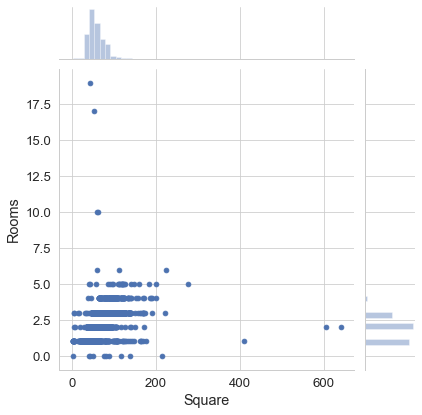

In [25]:
sns.jointplot(all_data['Square'], all_data['Rooms'], kind='scatter', height=6);

In [26]:
def df_ten_square_manual(df):
    df.loc[df['Square'] > 400, 'Square'] = df.loc[df['Square'] > 400, 'Square'] / 10
    return df

In [27]:
def df_ten_square(df):
    info_by_district_id = df.groupby(['DistrictId', 'Rooms', 'HouseYear'], as_index=False).agg(
        {'Square': 'mean'}).rename(
        columns={'Square': 'mean_square_rooms_dr'})

    df = pd.merge(df, info_by_district_id, on=[
        'DistrictId', 'Rooms', 'HouseYear'], how='left')

    df.loc[abs(df['Square'] - df['mean_square_rooms_dr']) > 2 * sigma, 'Square'] \
        = df.loc[abs(df['Square'] - df['mean_square_rooms_dr']) > 2 * sigma, 'Rooms'] \
        * df.loc[abs(df['Square'] - df['mean_square_rooms_dr']) > 2 * sigma, 'mean_square_per_room_in_dr']
    return df

In [28]:
def prepare_lifesquare(df):
    df.loc[df['Square'] < df['LifeSquare'],
           'LifeSquare'] = df.loc[df['Square'] < df['LifeSquare'], 'Square']
    return df


def fillna_life_square(df):
    df['LifeSquare'] = df['LifeSquare'].fillna(df['LifeSquare'].mean())
    return df

### Работа с годами

In [30]:
all_data.loc[all_data['HouseYear'] > 2020]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
1497,109,1,37.27,20.24,9.00,9,12,20052011,0.14,B,B,30,6141,10,262.00,3,6,B
4189,147,2,44.79,28.36,5.00,4,9,4968,0.32,B,B,25,4756,16,"2,857.00",5,8,B


In [31]:
def df_ten_house_year_manual(df):
    df.loc[df['HouseYear'] == 20052011, 'HouseYear'] = int((2005 + 2011) / 2)
    df.loc[df['HouseYear'] == 4968, 'HouseYear'] = 1968
    return df

In [32]:
print(train_df['DistrictId'].nunique(), ' уникальных  значений в train')
print(test_df['DistrictId'].nunique(), ' уникальных  значений в test')

205  уникальных  значений в train
201  уникальных  значений в test


In [33]:
district_size = train_df['DistrictId'].value_counts().reset_index()\
                .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})

district_size

,DistrictId,DistrictSize
0,27,851
1,1,652
2,23,565
3,6,511
4,9,294
...,...,...
200,199,1
201,205,1
202,174,1
203,209,1


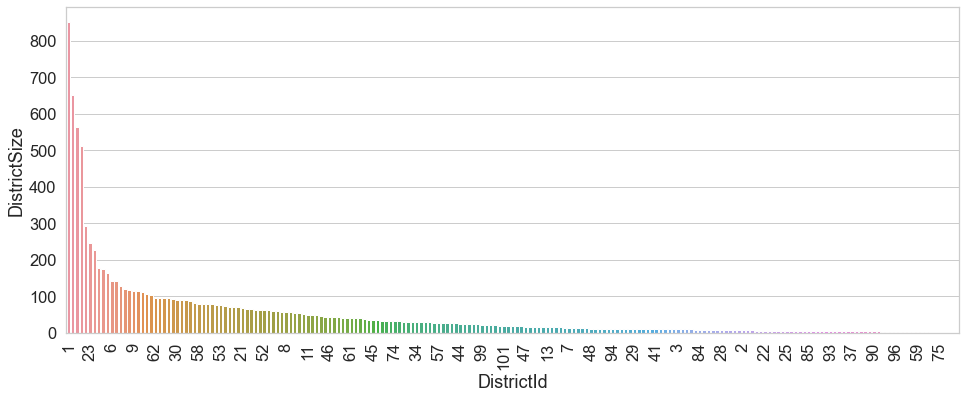

In [34]:
sns.set(style="whitegrid", font_scale=1.5)
f, ax = plt.subplots(figsize=(16, 6))
sns.barplot(y='DistrictSize', x='DistrictId', 
            data=district_size,
            order=district_size.sort_values(by='DistrictSize', ascending=False)['DistrictId']
           );
ax.tick_params(axis='x', rotation=90)
ax.xaxis.set_major_locator(plt.MaxNLocator(50))

In [35]:
district_size.loc[district_size['DistrictSize'] > 100, :]

,DistrictId,DistrictSize
0,27,851
1,1,652
2,23,565
3,6,511
4,9,294
5,62,247
6,30,228
7,58,179
8,53,174
9,21,165


In [36]:
districts_popular = district_size.loc[district_size['DistrictSize'] > 100, 'DistrictId'].tolist()

In [37]:
district_size.loc[~district_size['DistrictId'].isin(districts_popular), 'DistrictId'] = 999
district_size = district_size.groupby('DistrictId')['DistrictSize'].agg(
                            DistrictSize='median')
district_size.reset_index(level='DistrictId', inplace=True)
district_size

,DistrictId,DistrictSize
0,1,652
1,6,511
2,8,142
3,9,294
4,11,129
5,21,165
6,23,565
7,27,851
8,30,228
9,34,111


In [38]:
train_df.loc[~train_df['DistrictId'].isin(districts_popular), 'DistrictId'] = 999
test_df.loc[~test_df['DistrictId'].isin(districts_popular), 'DistrictId'] = 999

In [39]:
test_df['DistrictId'].value_counts()

999    2551
27      391
1       344
23      264
6       257
9       132
62      122
30      115
58       91
53       91
21       70
52       67
61       64
8        64
46       61
34       61
74       61
57       54
45       49
44       46
11       45
Name: DistrictId, dtype: int64

### Отбор признаков

In [40]:
train_df.to_csv('train_prepared.csv')
test_df.to_csv('test_prepared.csv')

In [41]:
feature_names = train_df.columns
feature_names.tolist()

['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price']

In [42]:
target_name = ['Price']
feature_names = [
#             'DistrictId',
             'Rooms',
             'Square',
#             'LifeSquare',
             'KitchenSquare',
             'Floor',
             'HouseFloor',
             'HouseYear',
             'Ecology_1',
#             'Ecology_2',
#             'Ecology_3',
             'Social_1',
             'Social_2',
             'Social_3',
#             'Healthcare_1',
             'Helthcare_2',
             'Shops_1',
#             'Shops_2',
#             'Price',
                ]

In [43]:
X = train_df[feature_names]
y = train_df[target_name]

X_test = test_df[feature_names]

In [44]:
len(feature_names)

12

### Random Forest

In [45]:
forest = RandomForestRegressor(max_depth=19, 
                               max_features=6, 
                               n_estimators=100,
                               random_state=42)

In [46]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

cv_score = cross_val_score(forest, X, y, scoring='r2', cv=kf)
print('R2: {:.5f}'.format(cv_score.mean()))

R2: 0.74364


In [47]:
forest.fit(X, y)
importances = forest.feature_importances_
feat_importances = pd.Series(importances, index=feature_names)
feat_importances.sort_values(ascending=True, inplace=True)

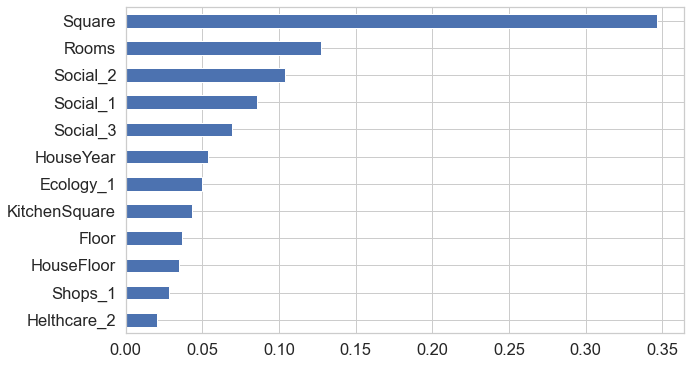

In [48]:
feat_importances.plot(kind='barh', figsize=(10, 6));

### Проверка R2

In [49]:
params = {
    'n_estimators': [400],
    'max_depth': [18,19,20],
    'max_features': [5,6,7]
}

In [50]:
forest_grid = GridSearchCV(forest, params, scoring='r2', 
                  cv=KFold(n_splits=10, random_state=42, shuffle=True), 
                  n_jobs=-1)
forest_grid.fit(X, y)
print(forest_grid.best_params_)
print('R2 на train: {:.5f}'.format(forest_grid.best_score_))

{'max_depth': 18, 'max_features': 5, 'n_estimators': 400}
R2 на train: 0.74666


In [52]:
forest_best = forest_grid.best_estimator_

y_pred = forest_best.predict(X_test)

In [53]:
preds = pd.DataFrame()
preds['Id'] = X_test.index
preds['Price'] = y_pred
preds.head()

,Id,Price
0,725,"161,373.98"
1,15856,"205,754.98"
2,5480,"225,320.31"
3,15664,"342,127.46"
4,14275,"137,064.35"


In [54]:
preds.to_csv('Varvarin_Matvei_predictions.csv', index=False)